# 第5回

### 1. 下記のサンプルコードを実行してMNISTデータを学習してください。
        1.simple_convnet.pyの実装も見てみましょう。

In [4]:
%matplotlib inline
import os, sys
import numpy as np
import matplotlib.pyplot as plt
from dataset.mnist import load_mnist
from simple_convnet import SimpleConvNet
from common.trainer import Trainer

# データの読み込み
(x_train, t_train), (x_test, t_test) = load_mnist(flatten=False)

# 処理に時間のかかる場合はデータを削減 
x_train, t_train = x_train[:5000], t_train[:5000]
x_test, t_test = x_test[:1000], t_test[:1000]

max_epochs = 5 #20

network = SimpleConvNet(input_dim=(1,28,28), 
                        conv_param = {'filter_num': 30, 'filter_size': 5, 'pad': 0, 'stride': 1},
                        hidden_size=100, output_size=10, weight_init_std=0.01)

train loss:2.300053173472783
=== epoch:1, train acc:0.169, test acc:0.171 ===
train loss:2.297233855027875
train loss:2.29424983099957
train loss:2.2852197662590426
train loss:2.2804218264253966
train loss:2.26110251577271
train loss:2.255420076771543
train loss:2.240951597458164
train loss:2.2199476718986664
train loss:2.1914244749982204
train loss:2.170442914537513
train loss:2.1177351725525746
train loss:2.0329768580486043
train loss:2.0516204313835535
train loss:1.94748353161682
train loss:1.876683614533828
train loss:1.8909112273752209
train loss:1.7878893736842634
train loss:1.7239230907163041
train loss:1.7067377137391628
train loss:1.5496520596749148
train loss:1.487479421446135
train loss:1.367974751968997
train loss:1.3497605410859803
train loss:1.2111307231664987
train loss:1.0414175222541726
train loss:1.1029045071740398
train loss:1.0080498499661688
train loss:1.0319722127508582
train loss:0.9319619670144788
train loss:0.8970645888038355
train loss:0.8546804719289554
train

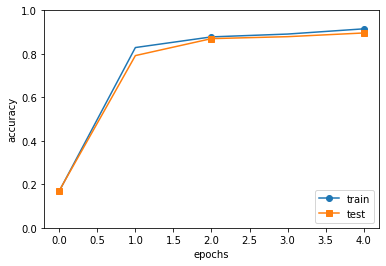

In [5]:
trainer = Trainer(network, x_train, t_train, x_test, t_test,
                  epochs=max_epochs, mini_batch_size=100,
                  optimizer='Adam', optimizer_param={'lr': 0.001},
                  evaluate_sample_num_per_epoch=1000)
trainer.train()

# パラメータの保存
network.save_params("params.pkl")
print("Saved Network Parameters!")

# グラフの描画
markers = {'train': 'o', 'test': 's'}
x = np.arange(max_epochs)
plt.plot(x, trainer.train_acc_list, marker='o', label='train', markevery=2)
plt.plot(x, trainer.test_acc_list, marker='s', label='test', markevery=2)
plt.xlabel("epochs")
plt.ylabel("accuracy")
plt.ylim(0, 1.0)
plt.legend(loc='lower right')
plt.show()

## 感想
ようやく画像の学習の基礎を学び終えることができ、良かったと思う。しかし、実装の一部（SimpleConvNetとTrainerの中身）について、まだよくわからないことがたくさんあるので、実践編で体感しながら学習していきたいと思う。

### 参考文献
[1] 斎藤康毅, 7.畳み込みニューラルネットワークの基礎, ゼロから作るDeepLearning，2020年, オライリージャパン，pp.205-239